# Wholesale Customers Analysis

## Problem Statement:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. 

## Data Description:

The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

## Domain:
Retail

## Context:
Leveraging sales information is paramount for customers. In the case of a retail chains, analysis of products of retail chaing sold across different region under different sales channel are very crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

## Attribute Information:

- Buyer/Spender
- Channel
- Region
- Fresh
- Milk
- Grocery
- Frozen
- Detergents_Paper
- Delicatessen

## Import all the necessary libraries

In [676]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os
from scipy.stats import variation

## Read the data into the notebook

In [677]:
df = pd.read_csv('Wholesale Customer.csv') 

In [678]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis 
 ## Checking the data types /information


In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


The data set contains 440 observations of data and 9 variables. Only Channel and Region are categorical while rest is numeric data. Since non null count is same in every column variable and is equal to total rows, hence there is no null data in any of these columns

## Checking for missing values

In [680]:
# Check for missing value in any colum
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

We can confirm that there is no NULL value

## Checking the shape (Number of rows and columns)

In [681]:
df.shape

(440, 9)

Total no of rows are 440 and columns are 9

## Checking for summary

In [682]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.50,127.16,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.30,12647.33,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.27,7380.38,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.28,9503.16,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.93,4854.67,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.49,4767.85,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.87,2820.11,3.0,408.25,965.5,1820.25,47943.0


Ignoring first column which is just a reference of Buyer/Spender no, we can see that :-
- max value of all the column attributes are high as compared to the median value. Hence there seems to be many outliers in this data. 
- On checking the median values (50%), it appears that retailers spend more on Fresh products and grocery as compared to others. 
- 75% of 440 retailers spend only 1820 or less on Delicatessen. So annual spend of Delicatessen appears to be least among all.

## Check for Outliers (Which all variables have an outlier?)

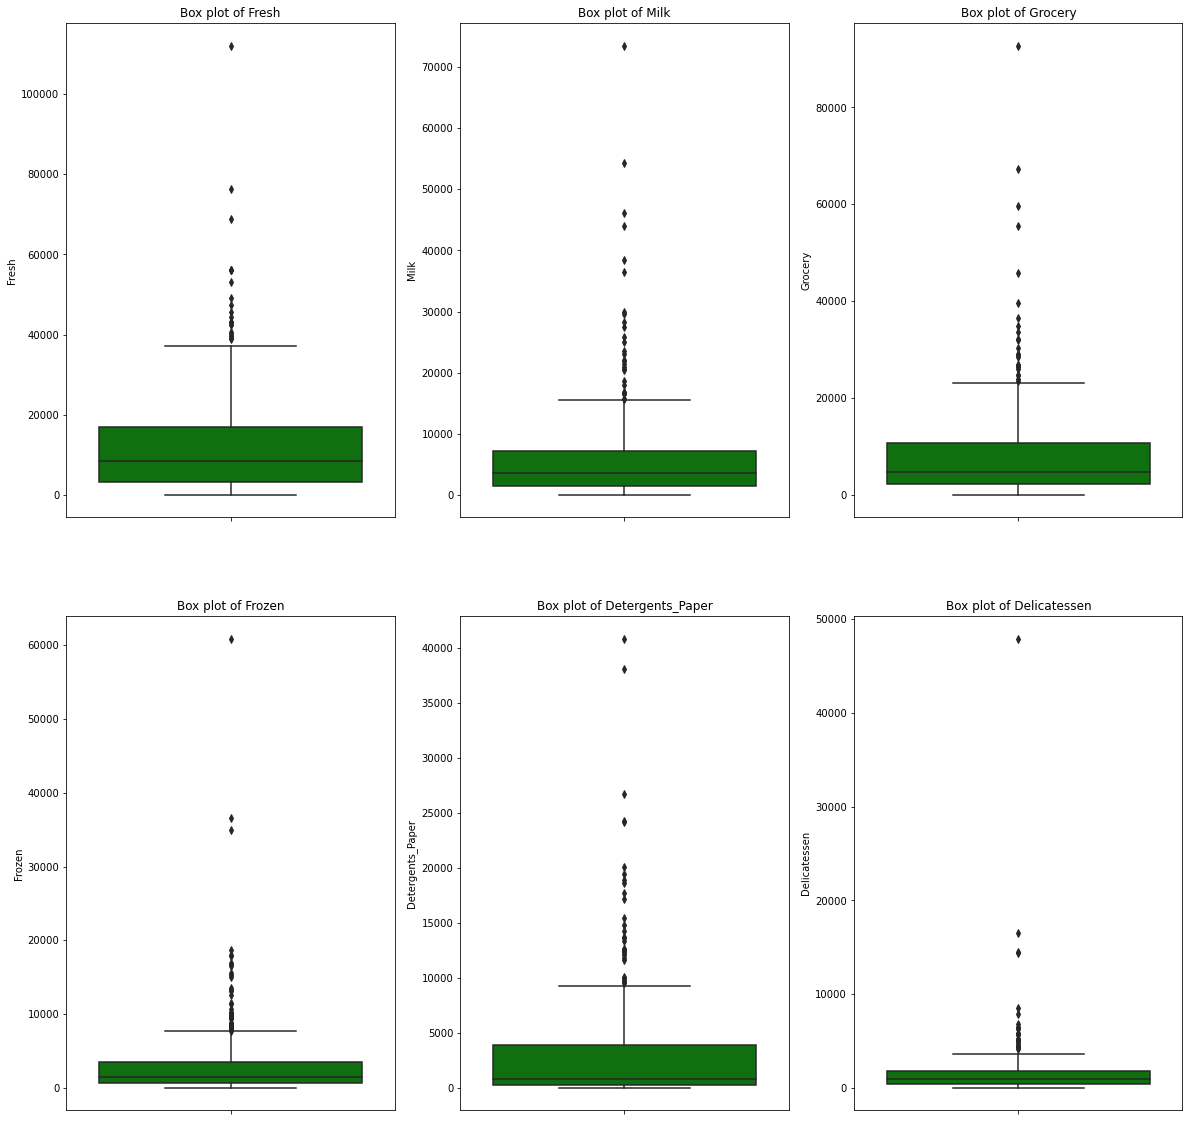

In [683]:
# Checking for Outliers
plt.figure(figsize= (20,20))
box_plot_no=1
for col in df.columns :
    if (col != 'Channel') and (col != 'Region') and (col != 'Buyer/Spender'):
        box_plot_title = "Box plot of " + col
        plt.subplot(2,3,box_plot_no)
        sns.boxplot(x= col,data =df ,color='green', orient = 'v').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


As evident from above box plots, all attributes have outliers. All outliers are on maximum side i.e. there are few retailers which are spending much more than the majority of the retailers. Data appears to be right skewed

## Plot the Histograms


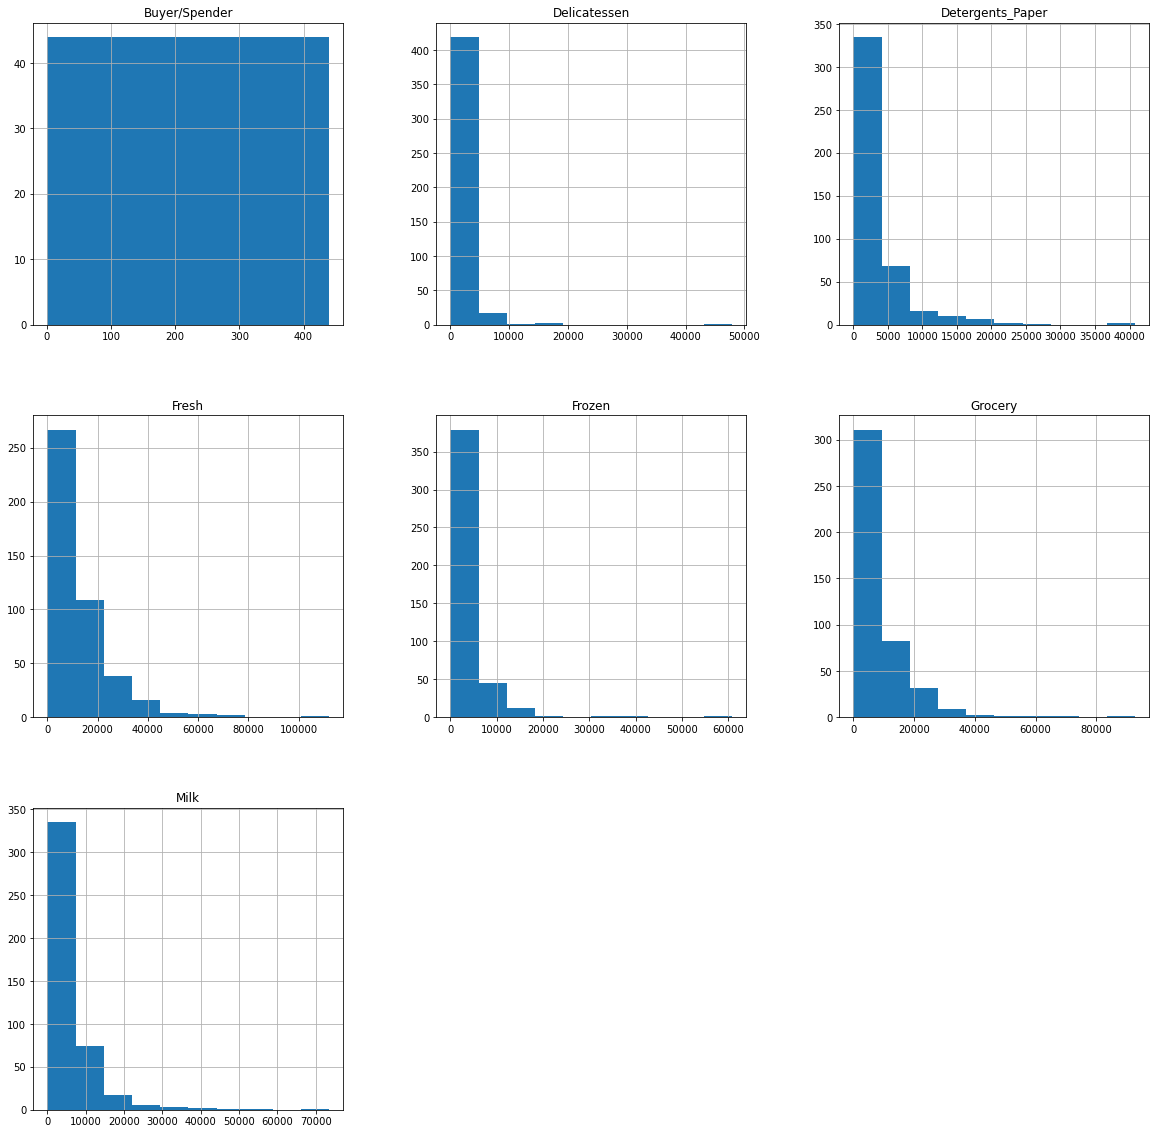

In [684]:
#Plots to see the distribution of the continuous features individually
df.hist(figsize=(20,20))
plt.show()


These histograms confirms that few high spender buyer are causing the data to be right/positve skewed. 

# 1.1) Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?.

Summary statistics is already present in the EDA done above

In [685]:
# adding a Total spend column in data 
df["Total_Spend"] = df["Fresh"] + df["Milk"] + df["Grocery"] + df["Frozen"] + df["Detergents_Paper"] + df["Delicatessen"]
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [686]:
# creating a pivot based on Region
dfa=pd.DataFrame(pd.pivot_table(df,index=['Region'],aggfunc=sum))
dfa.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfa


,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Region,,,,,,,,
Other,64026,512110,890410,3960577,930492,2495251,1888759,10677599
Lisbon,18095,104327,204136,854833,231026,570037,422454,2386813
Oporto,14899,54506,173311,464721,190132,433274,239144,1555088


In [687]:
first_row_index=0;
last_row_index=dfa.shape[0]-1;
#dfa.index[last_row_index]
print ('Region spending highest is {} and lowest is {}'.format(dfa.index[first_row_index],dfa.index[last_row_index]))

Region spending highest is Other and lowest is Oporto


We can concluded that 'Other' region is the highest spender. It seems like the obvious one because as seen in our EDA, 75% data is coming from Other category. Further we can see that lowest spenders are in 'Opporto' region

In [688]:
# creating a pivot based on Channel
dfb=pd.pivot_table(df,index=['Channel'],aggfunc=sum)
dfb.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfb

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931


In [689]:
first_row_index=0;
last_row_index=dfb.shape[0]-1;
#dfa.index[last_row_index]
print ('Channel spending highest is {} and lowest is {}'.format(dfb.index[first_row_index],dfb.index[last_row_index]))

Channel spending highest is Hotel and lowest is Retail


We can conclude that spending is highest under 'Hotel' channel as compared to 'Retail' channel.


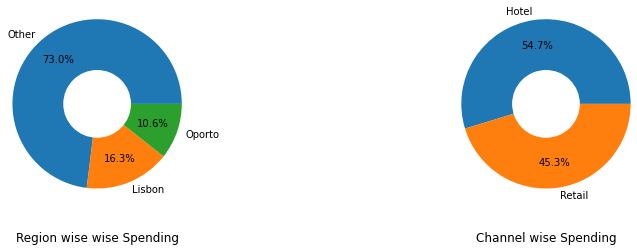

In [690]:
#creating a donut 
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,12)) 
ax1.pie(dfa["Total_Spend"],labels=dfa.index,autopct='%.1f%%',pctdistance=0.7,radius=2.5)
ax1.pie([1],colors=['w'],radius=1)

ax2.pie(dfb["Total_Spend"],labels=dfb.index,autopct='%.1f%%',pctdistance=0.7,radius=2.5)
ax2.pie([1],colors=['w'],radius=1)
ax1.title.set_position([.5, -1.2])
ax1.title.set_text("Region wise wise Spending")
ax2.title.set_position([.5, -1.2])
ax2.title.set_text("Channel wise Spending")
plt.tight_layout()

plt.show()


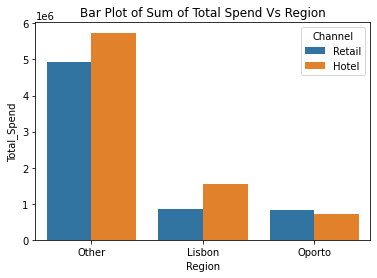

In [691]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Region");

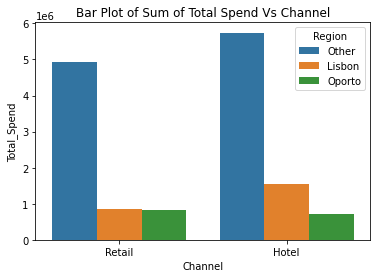

In [692]:
sns.barplot(x='Channel', y ='Total_Spend' , hue='Region',data=df,estimator=sum, ci=False ).set(title ="Bar Plot of Sum of Total Spend Vs Channel");

# 1.2) There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

## Checking behaviour across Region

In [693]:
df_Other=df[df["Region"]=='Other']
df_Oporto=df[df["Region"]=='Oporto']
df_Lisbon=df[df["Region"]=='Lisbon']



In [694]:
# dropping series which are not required
df_Other.drop('Buyer/Spender',axis=1,inplace=True)
df_Other.drop('Total_Spend',axis=1,inplace=True)
df_Oporto.drop('Buyer/Spender',axis=1,inplace=True)
df_Oporto.drop('Total_Spend',axis=1,inplace=True)
df_Lisbon.drop('Buyer/Spender',axis=1,inplace=True)
df_Lisbon.drop('Total_Spend',axis=1,inplace=True)


C:\Users\Raghav Gupta\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [695]:
# creating a function to return CV array
def CV_row(df):   
    i=0;
    CV=[]
    for i in df.columns:
        if (i != 'Channel') and (i != 'Region') and (i != 'Buyer/Spender') and (i != 'Total_Spend'):
            CV_val=  round(variation(df[i]),2)
            CV.append(CV_val)

    return CV    

In [696]:
# creating a function to return skew array
def Skew_row(df):   
    i=0;
    Skew=[]
    for i in df.columns:
        if (i != 'Channel') and (i != 'Region') and (i != 'Buyer/Spender') and (i != 'Total_Spend'):
            Skew_val=  round(df[i].skew(),2)
            Skew.append(Skew_val)

    return Skew    

In [697]:
df_Other_summ=pd.DataFrame(df_Other.describe().round(2))
df_Other_summ.loc["CV"]= CV_row(df_Other)
df_Other_summ.loc["Skew"]= Skew_row(df_Other)
df_Other_summ


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.00,316.00,316.00,316.00,316.00,316.00
mean,12533.47,5977.09,7896.36,2944.59,2817.75,1620.60
std,13389.21,7935.46,9537.29,4260.13,4593.05,3232.58
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3350.75,1634.00,2141.50,664.75,251.25,402.00
50%,8752.50,3684.50,4732.00,1498.00,856.00,994.00
75%,17406.50,7198.75,10559.75,3354.75,3875.75,1832.75
max,112151.00,73498.00,92780.00,36534.00,40827.00,47943.00
CV,1.07,1.33,1.21,1.44,1.63,1.99
Skew,2.62,4.25,3.84,3.96,3.71,10.21


In [698]:
df_Oporto_summ=pd.DataFrame(df_Oporto.describe().round(2))
df_Oporto_summ.loc["CV"]= CV_row(df_Oporto)
df_Oporto_summ.loc["Skew"]= Skew_row(df_Oporto)
df_Oporto_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.00,47.00,47.00,47.00,47.00,47.00
mean,9887.68,5088.17,9218.60,4045.36,3687.47,1159.70
std,8387.90,5826.34,10842.75,9151.78,6514.72,1050.74
min,3.00,333.00,1330.00,131.00,15.00,51.00
25%,2751.50,1430.50,2792.50,811.50,282.50,540.50
50%,8090.00,2374.00,6114.00,1455.00,811.00,898.00
75%,14925.50,5772.50,11758.50,3272.00,4324.50,1538.50
max,32717.00,25071.00,67298.00,60869.00,38102.00,5609.00
CV,0.84,1.13,1.16,2.24,1.75,0.90
Skew,0.98,1.80,3.64,5.49,3.62,2.15


In [699]:
df_Lisbon_summ=pd.DataFrame(df_Lisbon.describe().round(2))
df_Lisbon_summ.loc["CV"]= CV_row(df_Lisbon)
df_Lisbon_summ.loc["Skew"]= Skew_row(df_Lisbon)

df_Lisbon_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.00,77.00,77.00,77.00,77.00,77.00
mean,11101.73,5486.42,7403.08,3000.34,2651.12,1354.90
std,11557.44,5704.86,8496.29,3092.14,4208.46,1345.42
min,18.00,258.00,489.00,61.00,5.00,7.00
25%,2806.00,1372.00,2046.00,950.00,284.00,548.00
50%,7363.00,3748.00,3838.00,1801.00,737.00,806.00
75%,15218.00,7503.00,9490.00,4324.00,3593.00,1775.00
max,56083.00,28326.00,39694.00,18711.00,19410.00,6854.00
CV,1.03,1.03,1.14,1.02,1.58,0.99
Skew,2.01,1.92,2.02,2.33,2.36,2.05


In [700]:
# creating a function to rename column names
def new_col_name(df_Other_summ,suffix):
    
    i=0;
    col_name=[]
    for i in df_Other_summ.columns:
        new_name=  str(i) + suffix
        col_name.append(new_name)
        #print (new_name)


    return col_name    

In [701]:
# renaming the cols and adding suffix
col_name=[]
col_name=new_col_name(df_Other_summ,"_Other")    
df_Other_summ.columns =   col_name  
col_name=new_col_name(df_Oporto_summ,"_Oporto")    
df_Oporto_summ.columns =   col_name  
col_name=new_col_name(df_Lisbon_summ,"_Lisbon")    
df_Lisbon_summ.columns =   col_name  


In [702]:
df_Regionwise_Fresh_summ=pd.concat((df_Other_summ["Fresh_Other"],df_Oporto_summ["Fresh_Oporto"],df_Lisbon_summ["Fresh_Lisbon"]),axis=1,sort=False)
df_Regionwise_Fresh_summ

,Fresh_Other,Fresh_Oporto,Fresh_Lisbon
count,316.00,47.00,77.00
mean,12533.47,9887.68,11101.73
std,13389.21,8387.90,11557.44
min,3.00,3.00,18.00
25%,3350.75,2751.50,2806.00
50%,8752.50,8090.00,7363.00
75%,17406.50,14925.50,15218.00
max,112151.00,32717.00,56083.00
CV,1.07,0.84,1.03
Skew,2.62,0.98,2.01


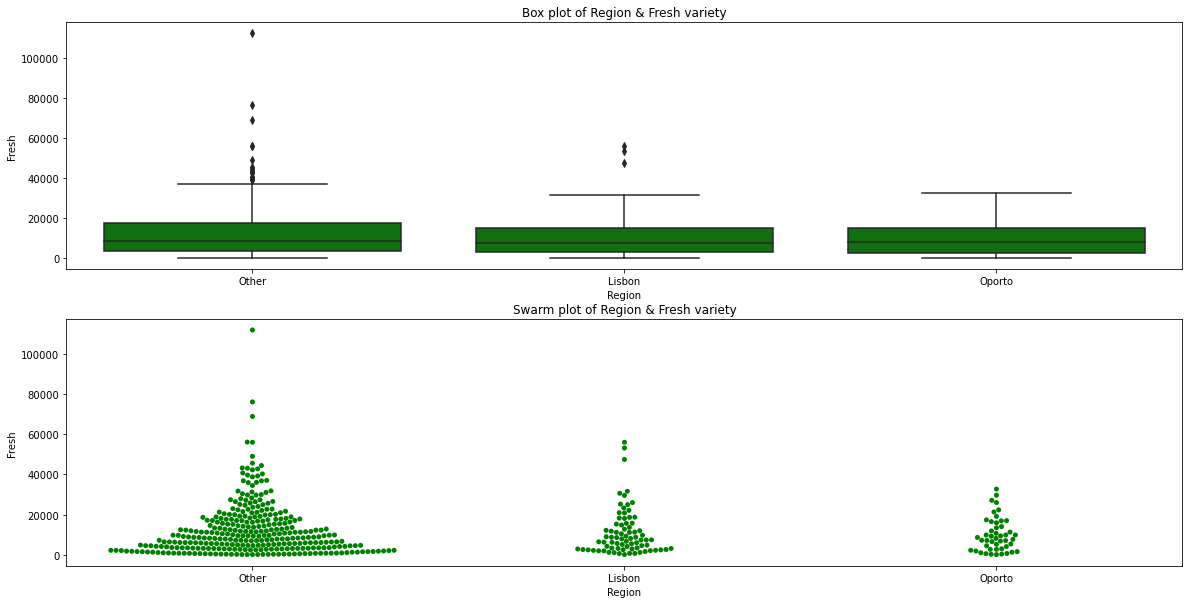

In [703]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Fresh variety"
sns.swarmplot(x="Region",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);



As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Other region as compared to Lisbon and Oporto.
- Except Oporto region, 'Other' and 'Lisbon' region Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Other' region is very high as compared to other regions.
- Annual median spend of Other region is slightly higher(8752) than of Lisbon(7363) and Oporto region(8090)
- Although mean and median value of 'Other' region is highest but its volatility is also high i.e. it is the most inconsistent region for Fresh Variety
- Spread of data looks similar across all regions with distribution being right/positive skewed and 75% of retailers spending less than 17.5K annually across all three regions.
- Footfall is more for buyers under 'Other' Region and majority of buyers(75%) are spending less than around 8K across all three regions.

In [704]:
df_Regionwise_Milk_summ=pd.concat((df_Other_summ.Milk_Other,df_Oporto_summ.Milk_Oporto,df_Lisbon_summ.Milk_Lisbon),axis=1,sort=False)
df_Regionwise_Milk_summ

,Milk_Other,Milk_Oporto,Milk_Lisbon
count,316.00,47.00,77.00
mean,5977.09,5088.17,5486.42
std,7935.46,5826.34,5704.86
min,55.00,333.00,258.00
25%,1634.00,1430.50,1372.00
50%,3684.50,2374.00,3748.00
75%,7198.75,5772.50,7503.00
max,73498.00,25071.00,28326.00
CV,1.33,1.13,1.03
Skew,4.25,1.80,1.92


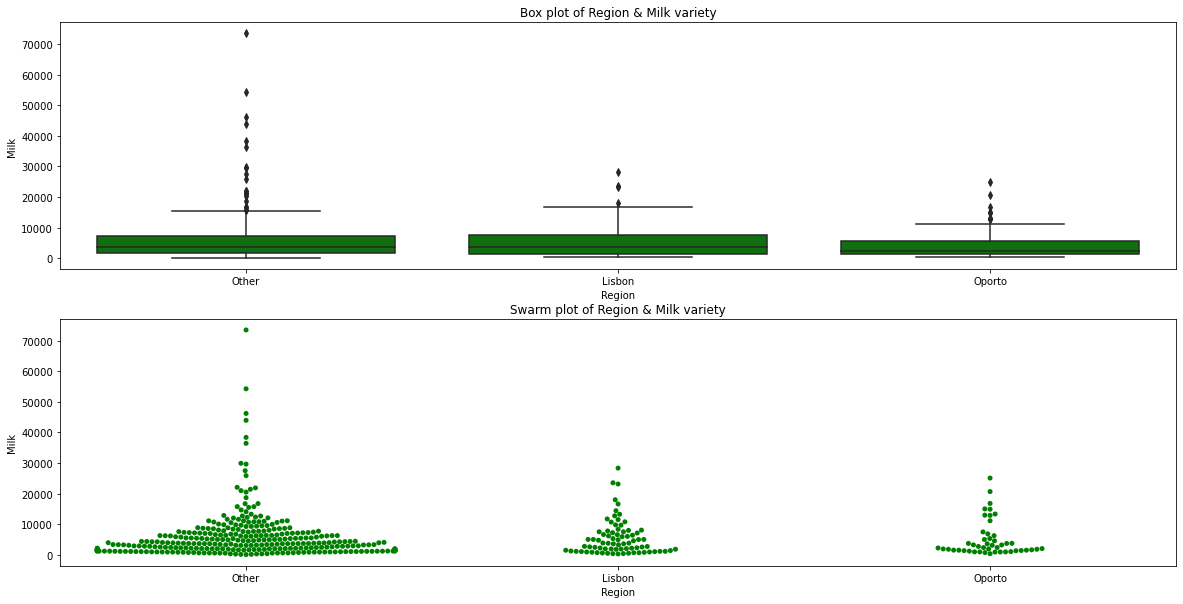

In [705]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Milk variety"
sns.swarmplot(x="Region",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Other region as compared to Lisbon and Oporto.
- All three regions Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Other' region is very high as compared to Lisbon/Oporto regions.
- Minimum annual spending in 'Other' region is  low as compared to other Lisbon/Oporto regions.
- Annual median spend of Oporto region is slightly lower(2374) than of Lisbon(3748) and Other region(3684)
- Volatility of other region is highest among all i.e. it is the most inconsistent region for Milk Variety
- Spread of data looks similar across all regions with distribution being right/positive skewed and 75% of retailers spending less than 7.5K annually across all three regions.
- Footfall is more for buyers under 'Other' Region and majority of buyers(75%) are spending less than around 3K across all three regions.



In [706]:
df_Regionwise_Grocery_summ=pd.concat((df_Other_summ.Grocery_Other,df_Oporto_summ.Grocery_Oporto,df_Lisbon_summ.Grocery_Lisbon),axis=1,sort=False)
df_Regionwise_Grocery_summ

,Grocery_Other,Grocery_Oporto,Grocery_Lisbon
count,316.00,47.00,77.00
mean,7896.36,9218.60,7403.08
std,9537.29,10842.75,8496.29
min,3.00,1330.00,489.00
25%,2141.50,2792.50,2046.00
50%,4732.00,6114.00,3838.00
75%,10559.75,11758.50,9490.00
max,92780.00,67298.00,39694.00
CV,1.21,1.16,1.14
Skew,3.84,3.64,2.02


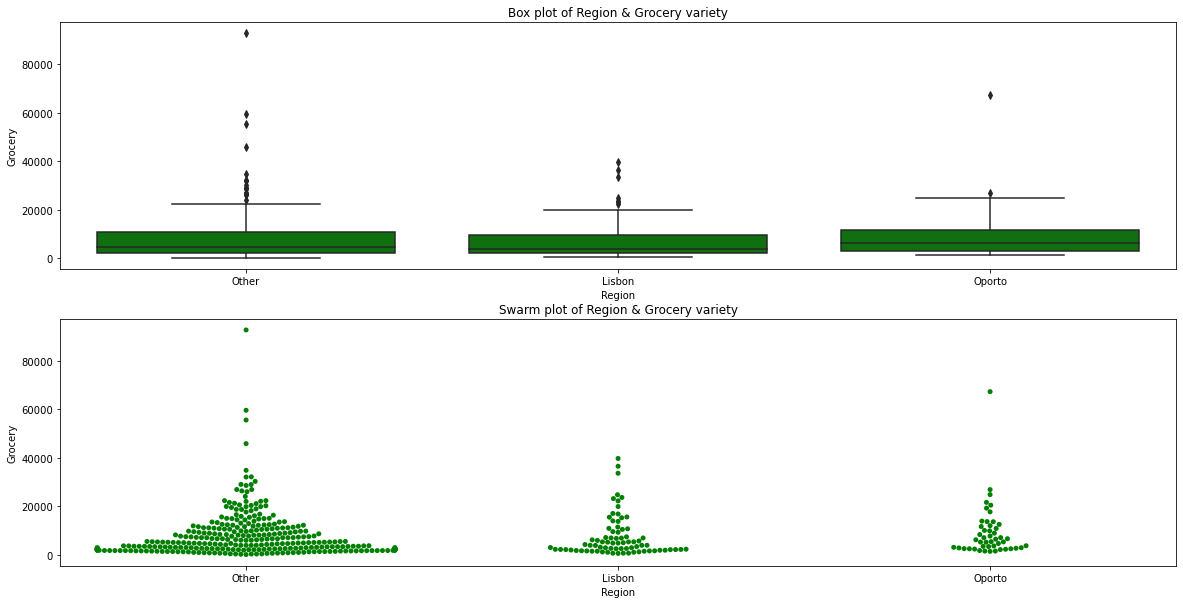

In [707]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Grocery variety"
sns.swarmplot(x="Region",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Other region as compared to Lisbon and Oporto.
- All three regions Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Other' region is very high as compared to Lisbon/Oporto regions.
- Minimum annual spending in 'Other' region is  low as compared to other Lisbon/Oporto regions.
- Annual median spend of Oporto region is highest(6114) as compared to Lisbon(3838) and Other region(4732)
- Volatility of other region is highest among all i.e. it is the most inconsistent region.
- Spread of data looks similar across all regions with distribution being right/positive skewed and 75% of retailers spending less than 11.7K annually across all three regions.
- Footfall is more for buyers under 'Other' Region and majority of buyers(75%) are spending less than around 10-11K across all three regions.

In [708]:
df_Regionwise_Frozen_summ=pd.concat((df_Other_summ.Frozen_Other,df_Oporto_summ.Frozen_Oporto,df_Lisbon_summ.Frozen_Lisbon),axis=1,sort=False)
df_Regionwise_Frozen_summ

,Frozen_Other,Frozen_Oporto,Frozen_Lisbon
count,316.00,47.00,77.00
mean,2944.59,4045.36,3000.34
std,4260.13,9151.78,3092.14
min,25.00,131.00,61.00
25%,664.75,811.50,950.00
50%,1498.00,1455.00,1801.00
75%,3354.75,3272.00,4324.00
max,36534.00,60869.00,18711.00
CV,1.44,2.24,1.02
Skew,3.96,5.49,2.33


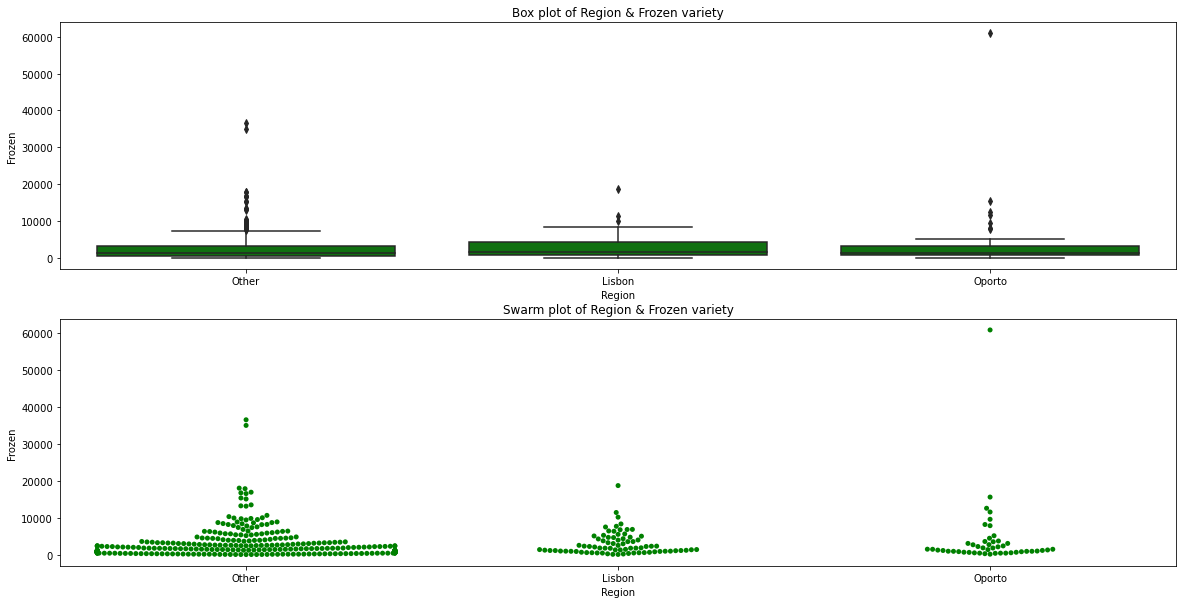

In [709]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Frozen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Frozen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Frozen variety"
sns.swarmplot(x="Region",y= "Frozen",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Other region as compared to Lisbon and Oporto.
- All three regions Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Oporto' region is very high as compared to Lisbon/Other regions.
- Minimum annual spending in 'Other' region is  low as compared to other Lisbon/Oporto regions.
- Annual median spend of Lisbon region is highest(1801) as compared to Oporto(1455) and Other region(1498)
- Volatility of 'Oporto' region is highest among all i.e. it is the most inconsistent region.
- Spread of data looks similar across all regions with distribution being right/positive skewed and 75% of retailers spending less than 4.3K annually across all three regions.
- Footfall is more for buyers under 'Other' Region and majority of buyers(75%) are spending less than around 3-4K across all three regions.


In [710]:
df_Regionwise_Detergents_Paper_summ=pd.concat((df_Other_summ.Detergents_Paper_Other,df_Oporto_summ.Detergents_Paper_Oporto,df_Lisbon_summ.Detergents_Paper_Lisbon),axis=1,sort=False)
df_Regionwise_Detergents_Paper_summ

,Detergents_Paper_Other,Detergents_Paper_Oporto,Detergents_Paper_Lisbon
count,316.00,47.00,77.00
mean,2817.75,3687.47,2651.12
std,4593.05,6514.72,4208.46
min,3.00,15.00,5.00
25%,251.25,282.50,284.00
50%,856.00,811.00,737.00
75%,3875.75,4324.50,3593.00
max,40827.00,38102.00,19410.00
CV,1.63,1.75,1.58
Skew,3.71,3.62,2.36


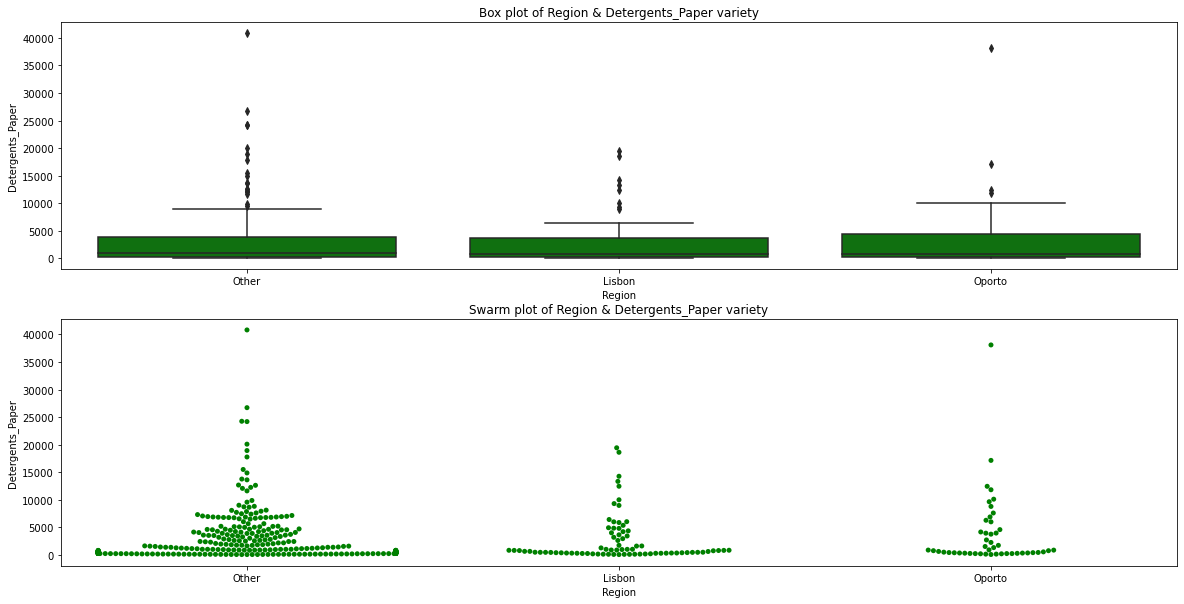

In [711]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Detergents_Paper variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Detergents_Paper",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Detergents_Paper variety"
sns.swarmplot(x="Region",y= "Detergents_Paper",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Other region as compared to Lisbon and Oporto.
- All three regions Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Other' region is very high as compared to Lisbon/Oporto regions.
- Minimum annual spending in 'Other' region is  low as compared to other Lisbon/Oporto regions.
- Annual median spend of 'Other' region is highest(856) as compared to Oporto(811) and Lisbon region(737)
- Volatility of 'Oporto' region is highest among all i.e. it is the most inconsistent region.
- Spread of data looks similar across all regions with distribution being right/positive skewed and 75% of retailers spending less than 4.3K annually across all three regions.
- Footfall is more for buyers under 'Other' Region and majority of buyers(75%) are spending less than 3-4K annually across all three regions.


In [712]:
df_Regionwise_Delicatessen_summ=pd.concat((df_Other_summ.Delicatessen_Other,df_Oporto_summ.Delicatessen_Oporto,df_Lisbon_summ.Delicatessen_Lisbon),axis=1,sort=False)
df_Regionwise_Delicatessen_summ

,Delicatessen_Other,Delicatessen_Oporto,Delicatessen_Lisbon
count,316.00,47.00,77.00
mean,1620.60,1159.70,1354.90
std,3232.58,1050.74,1345.42
min,3.00,51.00,7.00
25%,402.00,540.50,548.00
50%,994.00,898.00,806.00
75%,1832.75,1538.50,1775.00
max,47943.00,5609.00,6854.00
CV,1.99,0.90,0.99
Skew,10.21,2.15,2.05


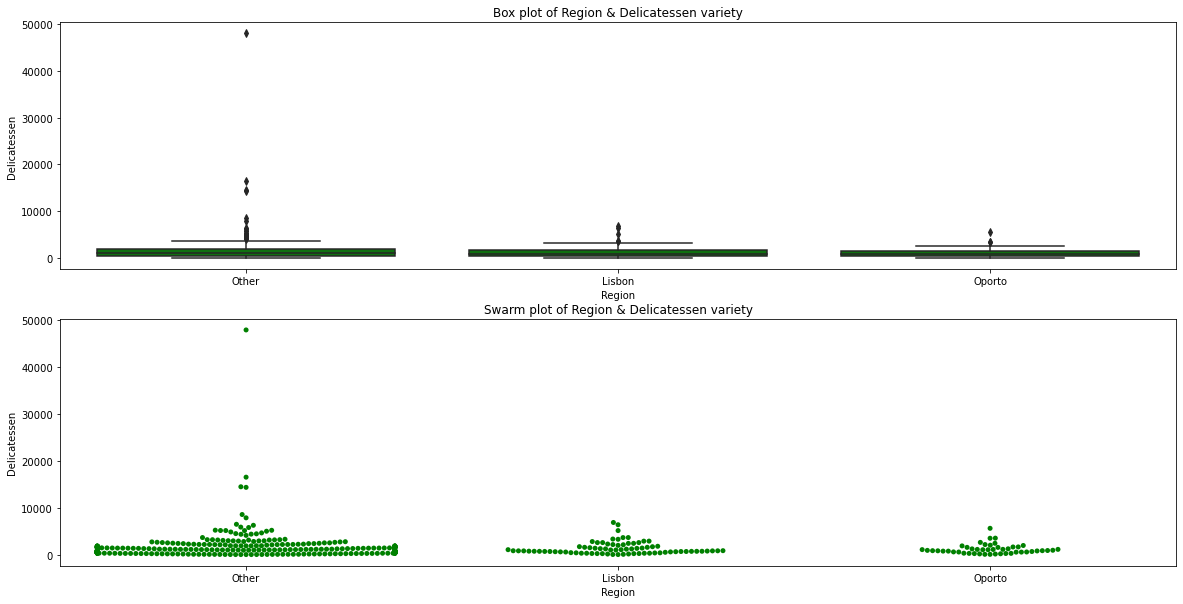

In [713]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Region & Delicatessen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Region & Delicatessen variety"
sns.swarmplot(x="Region",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Other region as compared to Lisbon and Oporto.
- All three regions Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Other' region is very high as compared to Lisbon/Oporto regions.
- Minimum annual spending in 'Other' region is  low as compared to other Lisbon/Oporto regions.
- Annual median spend of 'Other' region is highest(994) as compared to Oporto(898) and Lisbon region(806)
- Volatility of 'Other' region is highest among all i.e. it is the most inconsistent region.
- Spread of data looks similar across all regions with distribution being right/positive skewed and 75% of retailers spending less than 1.83K annually across all three regions.
- Footfall is more for buyers under 'Other' Region and majority of buyers(75%) are spending less than around 1.8K across all three regions.


## Checking behaviour across Channel

In [714]:
df_Hotel=df[df["Channel"]=='Hotel']
df_Retail=df[df["Channel"]=='Retail']

In [715]:
# dropping series which are not required
df_Hotel.drop('Buyer/Spender',axis=1,inplace=True)
df_Hotel.drop('Total_Spend',axis=1,inplace=True)
df_Retail.drop('Buyer/Spender',axis=1,inplace=True)
df_Retail.drop('Total_Spend',axis=1,inplace=True)

C:\Users\Raghav Gupta\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [716]:
df_Hotel_summ=pd.DataFrame(df_Hotel.describe().round(2))
df_Hotel_summ.loc["CV"]= CV_row(df_Hotel)
df_Hotel_summ.loc["Skew"]= Skew_row(df_Hotel)
df_Hotel_summ


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.00,298.00,298.00,298.00,298.00,298.00
mean,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00
CV,1.02,1.26,0.89,1.50,1.39,2.22
Skew,2.51,4.66,2.12,5.21,2.86,11.52


In [717]:
df_Retail_summ=pd.DataFrame(df_Retail.describe().round(2))
df_Retail_summ.loc["CV"]= CV_row(df_Retail)
df_Retail_summ.loc["Skew"]= Skew_row(df_Retail)
df_Retail_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.00,142.00,142.00,142.00,142.00,142.00
mean,8904.32,10716.50,16322.85,1652.61,7269.51,1753.44
std,8987.71,9679.63,12267.32,1812.80,6291.09,1953.80
min,18.00,928.00,2743.00,33.00,332.00,3.00
25%,2347.75,5938.00,9245.25,534.25,3683.50,566.75
50%,5993.50,7812.00,12390.00,1081.00,5614.50,1350.00
75%,12229.75,12162.75,20183.50,2146.75,8662.50,2156.00
max,44466.00,73498.00,92780.00,11559.00,40827.00,16523.00
CV,1.01,0.90,0.75,1.09,0.86,1.11
Skew,1.59,3.41,2.98,2.53,2.61,3.77


In [718]:
# renaming the cols and adding suffix
col_name=[]
col_name=new_col_name(df_Hotel_summ,"_Hotel")    
df_Hotel_summ.columns =   col_name  
col_name=new_col_name(df_Retail_summ,"_Retail")    
df_Retail_summ.columns =   col_name  
df_Hotel_summ

,Fresh_Hotel,Milk_Hotel,Grocery_Hotel,Frozen_Hotel,Detergents_Paper_Hotel,Delicatessen_Hotel
count,298.00,298.00,298.00,298.00,298.00,298.00
mean,13475.56,3451.72,3962.14,3748.25,790.56,1415.96
std,13831.69,4352.17,3545.51,5643.91,1104.09,3147.43
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,4070.25,1164.50,1703.75,830.00,183.25,379.00
50%,9581.50,2157.00,2684.00,2057.50,385.50,821.00
75%,18274.75,4029.50,5076.75,4558.75,899.50,1548.00
max,112151.00,43950.00,21042.00,60869.00,6907.00,47943.00
CV,1.02,1.26,0.89,1.50,1.39,2.22
Skew,2.51,4.66,2.12,5.21,2.86,11.52


In [719]:
df_Channelwise_Fresh_summ=pd.concat((df_Hotel_summ["Fresh_Hotel"],df_Retail_summ["Fresh_Retail"]),axis=1,sort=False)
df_Channelwise_Fresh_summ

,Fresh_Hotel,Fresh_Retail
count,298.00,142.00
mean,13475.56,8904.32
std,13831.69,8987.71
min,3.00,18.00
25%,4070.25,2347.75
50%,9581.50,5993.50
75%,18274.75,12229.75
max,112151.00,44466.00
CV,1.02,1.01
Skew,2.51,1.59


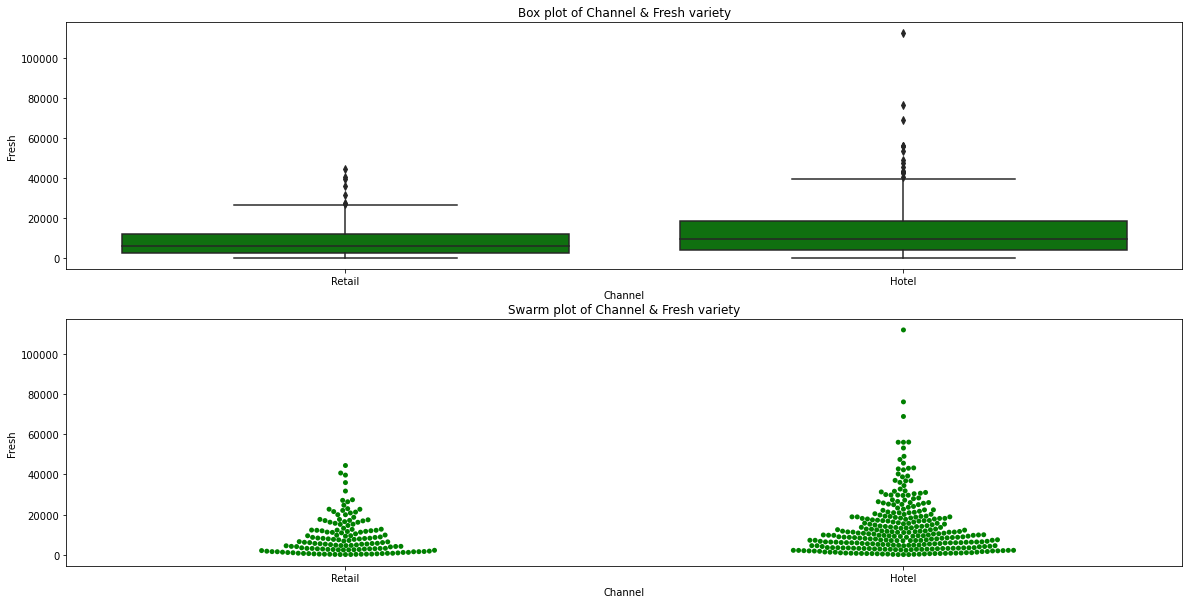

In [720]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Fresh variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Fresh",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Fresh variety"
sns.swarmplot(x="Channel",y= "Fresh",data =df ,color='green').set(title =swarm_plot_title);




As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Hotel channel as compared to Retail channel
- Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Hotel' Channel is high as compared to Retail Channel
- Min annual spending in 'Hotel' Channel is low as compared to Retail Channel
- Annual median spend of Hotel channel is higher(9581) than of Retail channel(5993)
- Volatility of both the channels is similar.
- Spread of data looks similar across both channels with distribution being right/positive skewed and 75% of retailers spending less than 18K annually on Hotel channel and 12.2K on Retail channel respectively.
- Footfall is more for buyers of Fresh variety under Hotel channel and buyers are spending much more money on Milk variety under Hotel channel. 

In [721]:
df_Channelwise_Milk_summ=pd.concat((df_Hotel_summ["Milk_Hotel"],df_Retail_summ["Milk_Retail"]),axis=1,sort=False)
df_Channelwise_Milk_summ

,Milk_Hotel,Milk_Retail
count,298.00,142.00
mean,3451.72,10716.50
std,4352.17,9679.63
min,55.00,928.00
25%,1164.50,5938.00
50%,2157.00,7812.00
75%,4029.50,12162.75
max,43950.00,73498.00
CV,1.26,0.90
Skew,4.66,3.41


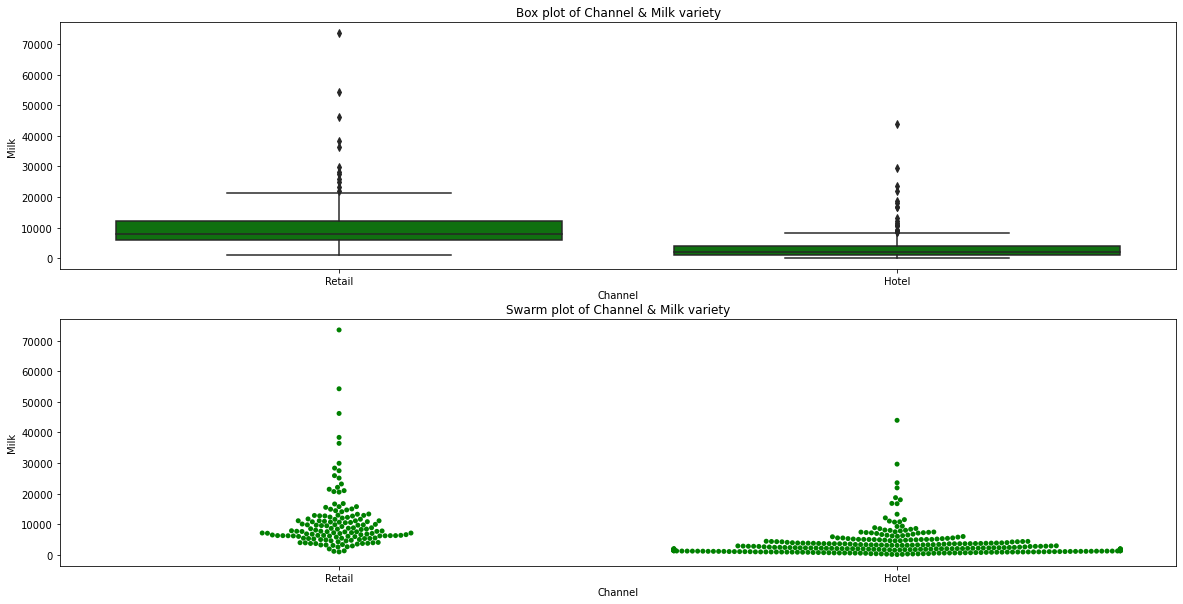

In [722]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Milk variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Milk",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Milk variety"
sns.swarmplot(x="Channel",y= "Milk",data =df ,color='green').set(title =swarm_plot_title);



As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Hotel channel as compared to Retail channel
- Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Retail' Channel is high as compared to Hotel Channel
- Min annual spending in 'Hotel' Channel is low as compared to Retail Channel
- Annual median spend of Hotel channel(2157) is very low as compared to Retail channel(7812)
- Volatility of Hotel channel is higher than of Retail channel.
- Spread of data looks similar across both channels with distribution being right/positive skewed and 75% of retailers spending less than 4K annually on Hotel channel and 12K on Retail channel respectively. 
- Although footfall is more for buyers of Milk variety under Hotel channel but buyers are spending more money on Milk variety under Retail channel. 

In [723]:
df_Channelwise_Grocery_summ=pd.concat((df_Hotel_summ["Grocery_Hotel"],df_Retail_summ["Grocery_Retail"]),axis=1,sort=False)
df_Channelwise_Grocery_summ

,Grocery_Hotel,Grocery_Retail
count,298.00,142.00
mean,3962.14,16322.85
std,3545.51,12267.32
min,3.00,2743.00
25%,1703.75,9245.25
50%,2684.00,12390.00
75%,5076.75,20183.50
max,21042.00,92780.00
CV,0.89,0.75
Skew,2.12,2.98


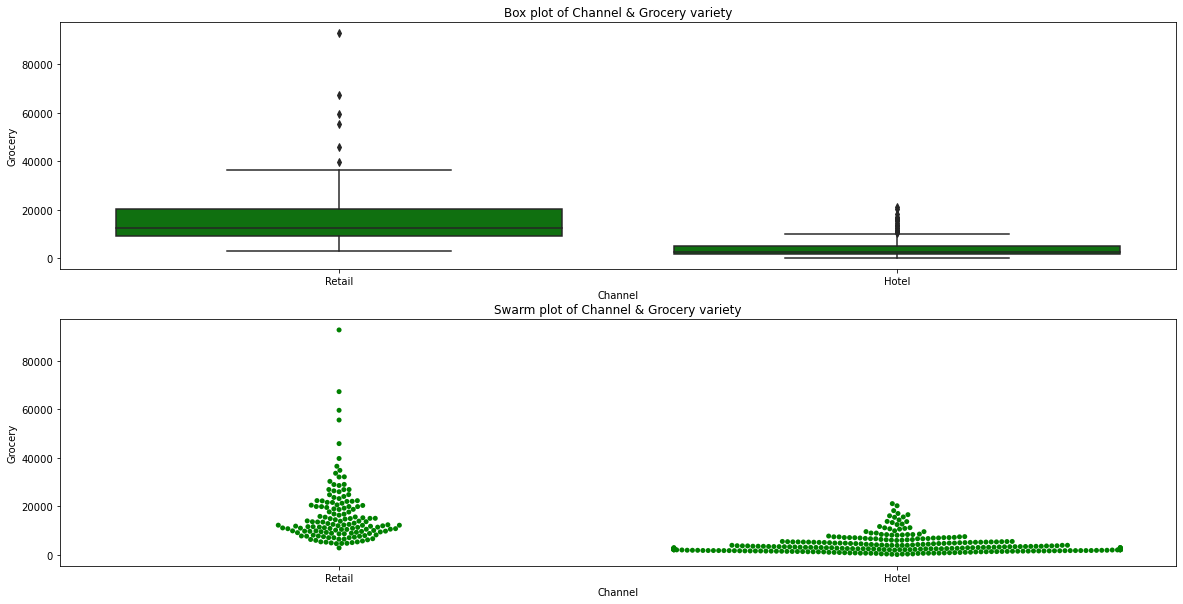

In [724]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Grocery variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Grocery",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Grocery variety"
sns.swarmplot(x="Channel",y= "Grocery",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Hotel channel as compared to Retail channel
- Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Retail' Channel is high as compared to Hotel Channel
- Min annual spending in 'Hotel' Channel is low as compared to Retail Channel
- Annual median spend of Hotel channel(2684) is very low as compared to Retail channel(12390)
- Volatility of Hotel channel is higher than of Retail channel.
- Spread of data looks similar across both channels with distribution being right/positive skewed and 75% of retailers spending less than 5K annually on Hotel channel and 20K on Retail channel respectively.
- Although Footfall is more for buyers of Grocery variety under Hotel channel but the buyers are spending more money on Grocery variety under Retail channel. 


In [725]:
df_Channelwise_Frozen_summ=pd.concat((df_Hotel_summ["Frozen_Hotel"],df_Retail_summ["Frozen_Retail"]),axis=1,sort=False)
df_Channelwise_Frozen_summ

,Frozen_Hotel,Frozen_Retail
count,298.00,142.00
mean,3748.25,1652.61
std,5643.91,1812.80
min,25.00,33.00
25%,830.00,534.25
50%,2057.50,1081.00
75%,4558.75,2146.75
max,60869.00,11559.00
CV,1.50,1.09
Skew,5.21,2.53


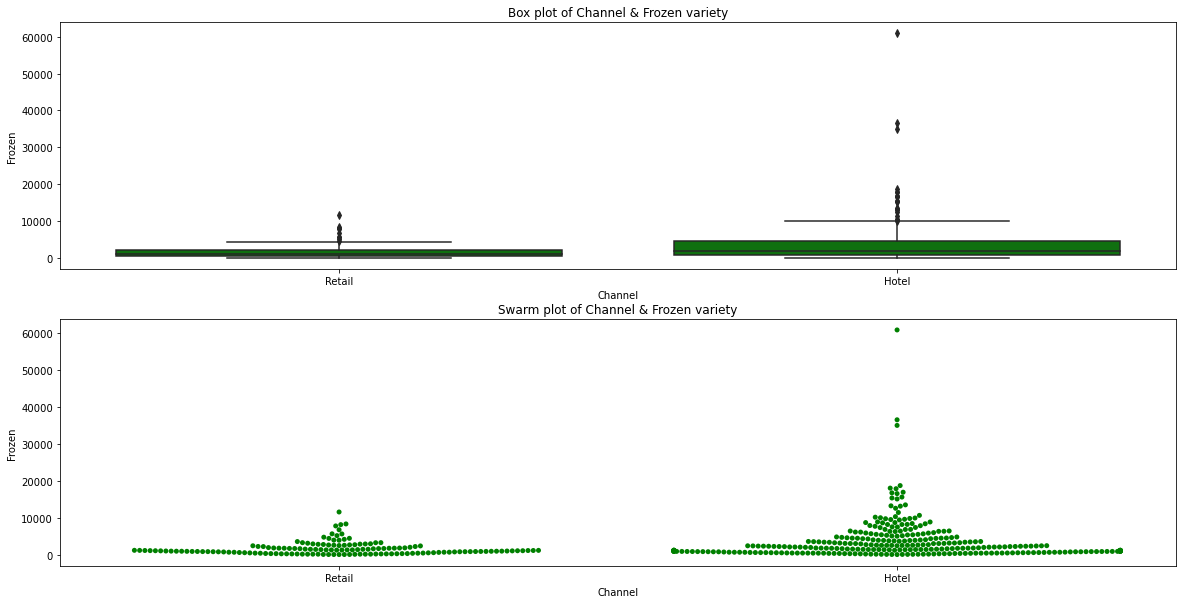

In [726]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Frozen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Frozen",data =df ,color='green').set(title=box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Frozen variety"
sns.swarmplot(x="Channel",y= "Frozen",data =df ,color='green').set(title=swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Hotel channel as compared to Retail channel
- Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Hotel' Channel is high as compared to Retail Channel
- Min annual spending in 'Hotel' Channel is similar compared to Retail Channel
- Annual median spend of Hotel channel(2057) is high as compared to Retail channel(1081)
- Volatility of Hotel channel is higher than of Retail channel.
- Spread of data looks similar across both channels with distribution being right/positive skewed and 75% of retailers spending less than 4.5K annually on Hotel channel and 2.1K on Retail channel respectively.
- The Footfall is more for buyers under Hotel channel and the buyers are spending more money on Frozen variety under Hotel channel as compared to Retail channel


In [727]:
df_Channelwise_Detergents_Paper_summ=pd.concat((df_Hotel_summ["Detergents_Paper_Hotel"],df_Retail_summ["Detergents_Paper_Retail"]),axis=1,sort=False)
df_Channelwise_Detergents_Paper_summ

,Detergents_Paper_Hotel,Detergents_Paper_Retail
count,298.00,142.00
mean,790.56,7269.51
std,1104.09,6291.09
min,3.00,332.00
25%,183.25,3683.50
50%,385.50,5614.50
75%,899.50,8662.50
max,6907.00,40827.00
CV,1.39,0.86
Skew,2.86,2.61


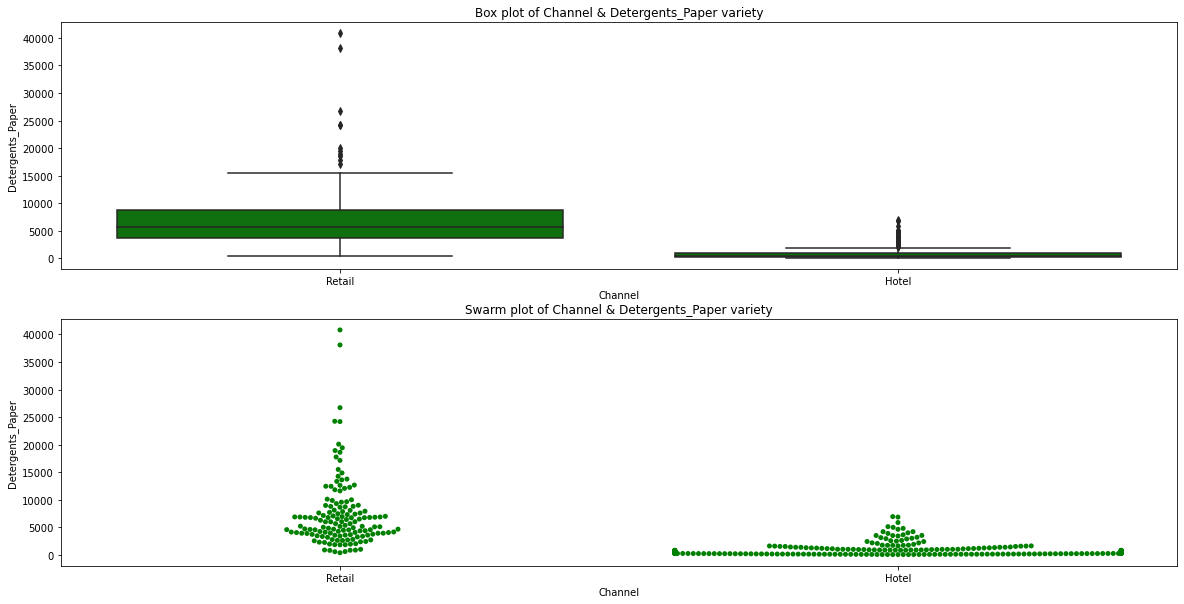

In [728]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Detergents_Paper variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Detergents_Paper",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Detergents_Paper variety"
sns.swarmplot(x="Channel",y= "Detergents_Paper",data =df ,color='green').set(title =swarm_plot_title);

As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Hotel channel as compared to Retail channel
- Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Retail' Channel is high as compared to Hotel Channel
- Min annual spending in 'Hotel' Channel is low as compared to Retail Channel
- Annual median spend of Hotel channel(385) is very low as compared to Retail channel(5614)
- Volatility of Hotel channel is higher than of Retail channel.
- Spread of data looks similar across both channels with distribution being right/positive skewed and 75% of retailers spending less than 0.9K annually on Hotel channel and 8.6K on Retail channel respectively.
- Although Footfall is more for buyers under Hotel channel but the buyers are spending more money on Detergent_Paper variety under Retail channel. 


In [729]:
df_Channelwise_Delicatessen_summ=pd.concat((df_Hotel_summ["Delicatessen_Hotel"],df_Retail_summ["Delicatessen_Retail"]),axis=1,sort=False)
df_Channelwise_Delicatessen_summ

,Delicatessen_Hotel,Delicatessen_Retail
count,298.00,142.00
mean,1415.96,1753.44
std,3147.43,1953.80
min,3.00,3.00
25%,379.00,566.75
50%,821.00,1350.00
75%,1548.00,2156.00
max,47943.00,16523.00
CV,2.22,1.11
Skew,11.52,3.77


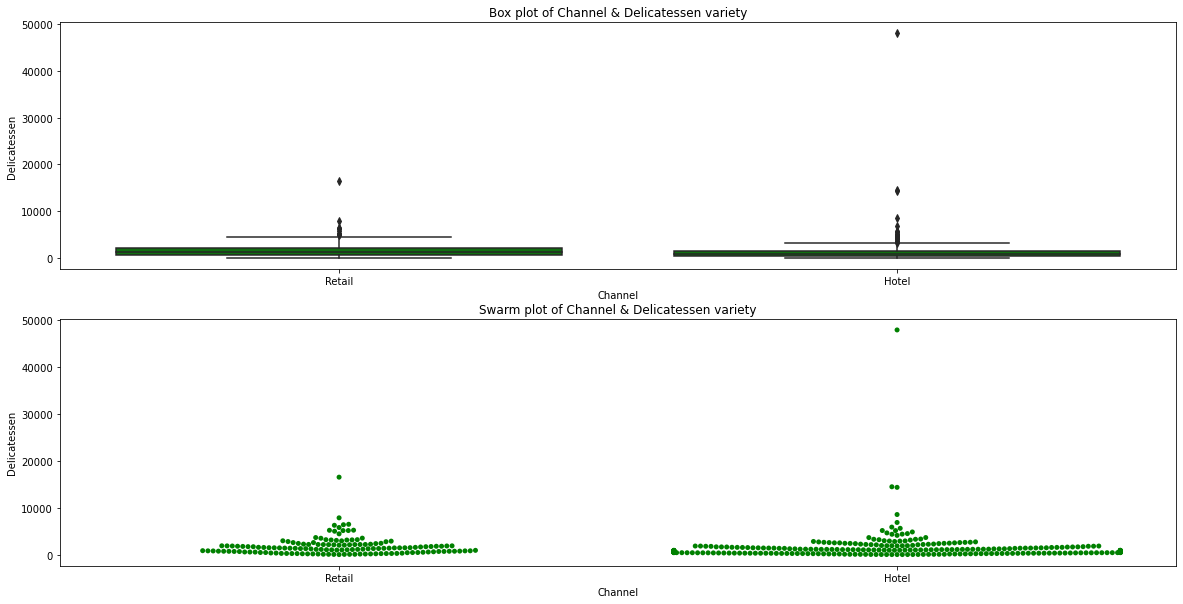

In [730]:
plt.figure(figsize= (20,10))
box_plot_title = "Box plot of Channel & Delicatessen variety"
plt.subplot(2,1,1)
sns.boxplot(x="Channel",y= "Delicatessen",data =df ,color='green').set(title =box_plot_title);
plt.subplot(2,1,2)
swarm_plot_title = "Swarm plot of Channel & Delicatessen variety"
sns.swarmplot(x="Channel",y= "Delicatessen",data =df ,color='green').set(title =swarm_plot_title);

 As seen in the summary statistics and swarm plot/box plot,
- Data contains more retailers in Hotel channel as compared to Retail channel
- Data contains outliers as seen in box plot. Hence we are using median values for comparison instead of mean.
- Maximum annual spending in 'Hotel' Channel is high as compared to Retail Channel
- Min annual spending in 'Hotel' Channel is similar to Retail Channel
- Annual median spend of Hotel channel(821) is very low as compared to Retail channel(1350)
- Volatility of Hotel channel is higher than of Retail channel.
- Spread of data looks similar across both channels with distribution being right/positive skewed and 75% of retailers spending less than 1.5K annually on Hotel channel and 2.1K on Retail channel respectively.
- Although Footfall is more for buyers under Hotel channel but the buyers are spending more money on Delicateessen variety under Retail channel. 


# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [731]:
dfc=df.copy()
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [732]:
# dropping cols for which behaviour is not required
dfc.drop('Total_Spend',axis=1,inplace=True)
dfc.drop('Buyer/Spender',axis=1,inplace=True)


In [733]:
df_summ=pd.DataFrame(dfc.describe().round(2))
df_summ.loc["CV"]= CV_row(dfc)
#df_summ.loc["Skew"]= Skew_row(dfc)
df_summ

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00
CV,1.05,1.27,1.19,1.58,1.65,1.85


As seen above, item which is showing most inconsistent behaviour is 'Delicatessen' and item which is showing lowest inconsistent behaviour is 'Fresh'

# 1.4 Are there any outliers in the data?

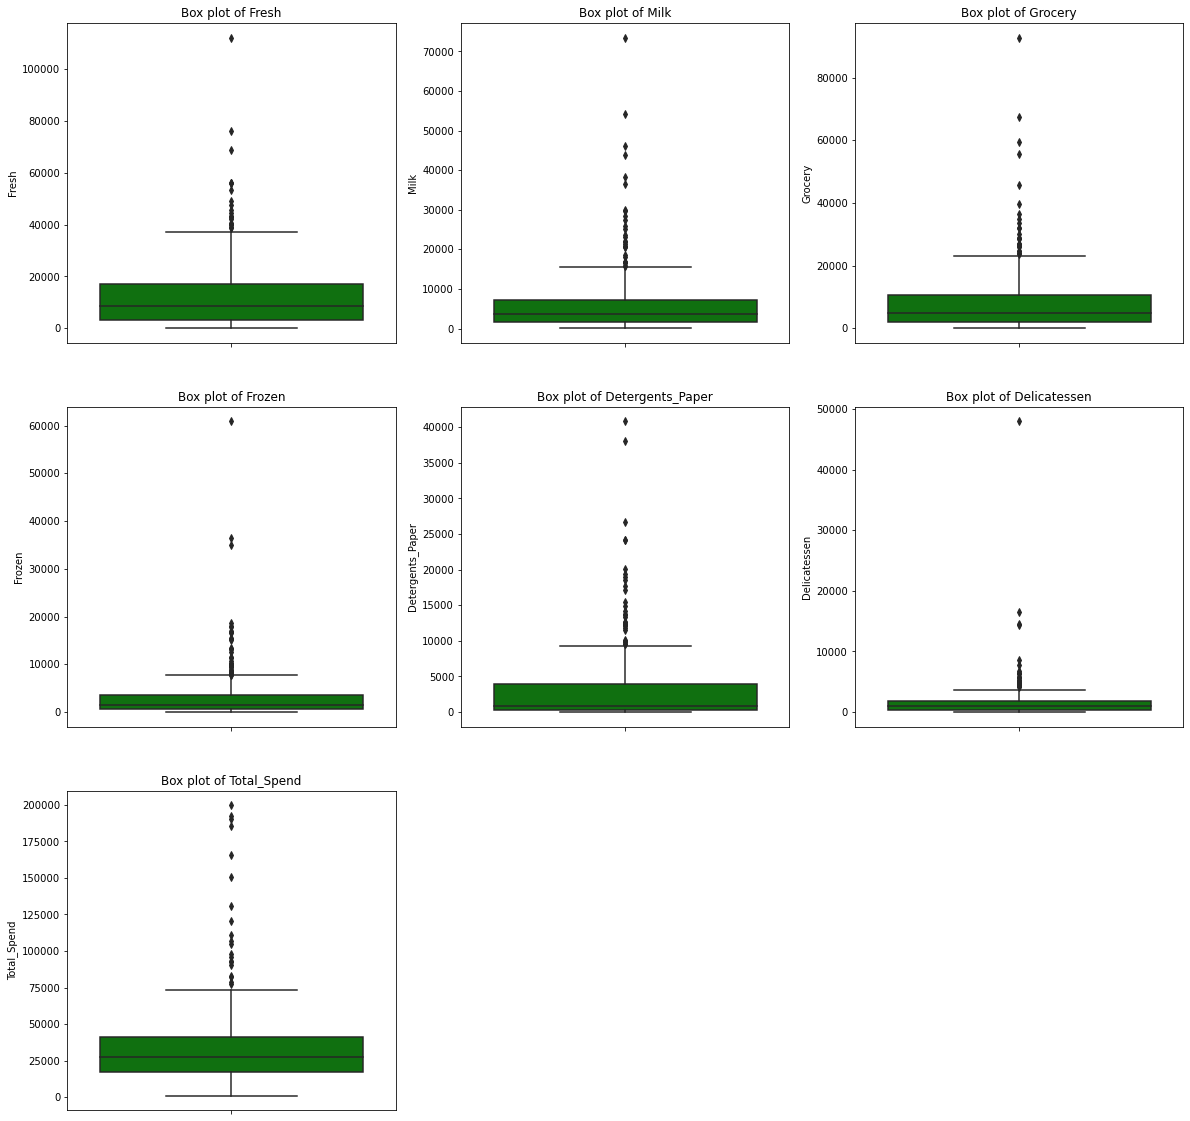

In [735]:
# Checking for Outliers
plt.figure(figsize= (20,20))
box_plot_no=1
for col in df.columns :
    if (col != 'Channel') and (col != 'Region') and (col != 'Buyer/Spender'):
        box_plot_title = "Box plot of " + col
        plt.subplot(3,3,box_plot_no)
        sns.boxplot(x= col,data =df ,color='green', orient = 'v').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


As evident from above box plots, all attributes have outliers. All outliers are on maximum side i.e. there are few retailers which are spending much more than the majority of the retailers. Data appears to be right skewed

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

In [736]:
# checking Region and channel counts
pd.crosstab(df["Region"],df["Channel"],margins=True)

Channel,Hotel,Retail,All
Region,,,
Lisbon,59,18,77
Oporto,28,19,47
Other,211,105,316
All,298,142,440


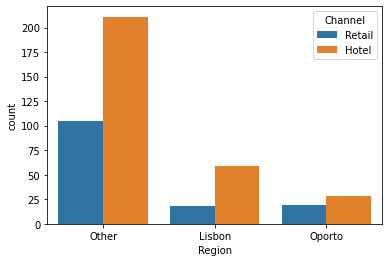

In [737]:
sns.countplot(x='Region' , hue='Channel',data=df);

It means that around 75% of data has region as 'Other' i.e. region of most of the spenders is unknown. Another thing to notice here is that 67% of buyers are spending via 'Hotel' channel

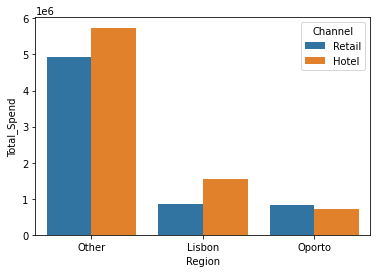

In [738]:
sns.barplot(x='Region', y ='Total_Spend' , hue='Channel',data=df,estimator=sum, ci=False );

Now since other region hotel channel has the highest no of spenders , this is most spending region and channel for the wholesaler.
Further Oporto region has lower no of spenders under retail channel but total spending is higher than Hotel channel. It means in Oporto buyers are spending more money under Retail channel.

In [739]:
# checking correlation
corr = dfc.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


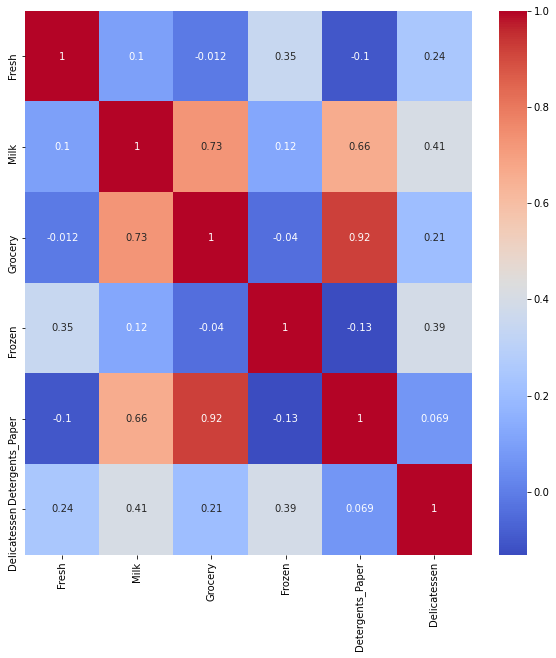

In [740]:
# plotting a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

As seen in heatmap, Grocery and Detergent_Paper have a very strong correlation. Grocery and Milk also has strong correlation.
Frozen + Detergent_Paper & Detergent_paper + Fresh have negative correlation.

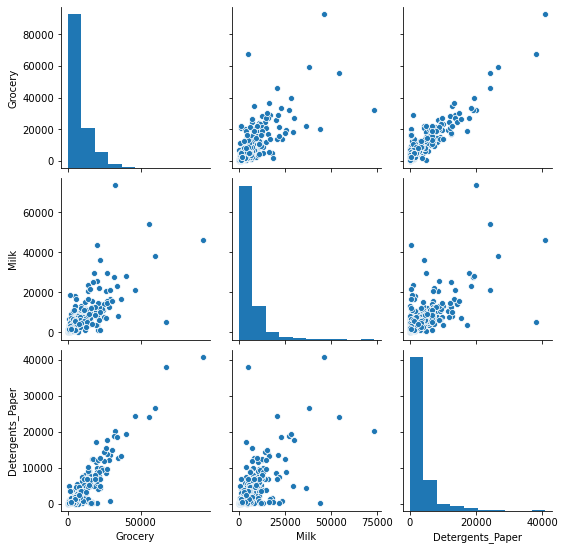

In [741]:
sns.pairplot(dfc[["Grocery","Milk","Detergents_Paper"]]);

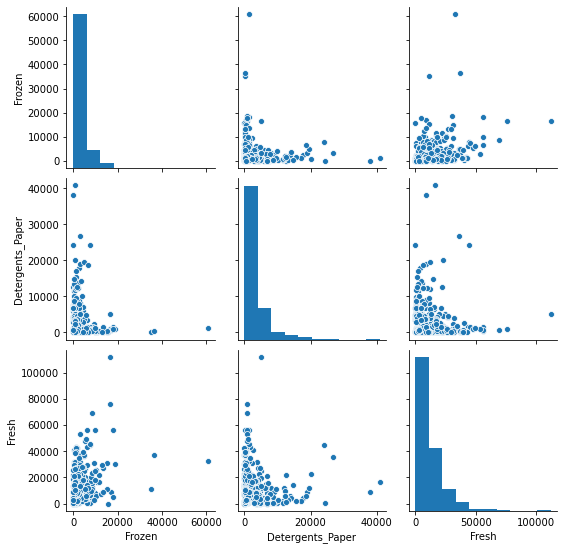

In [742]:
sns.pairplot(dfc[["Frozen","Detergents_Paper","Fresh"]]);

In [743]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Region','Channel'],aggfunc=sum,margins=True))
dfd.sort_values(by='Total_Spend',inplace=True,ascending=False)
dfd

Buyer/Spender  Delicatessen  Detergents_Paper    Fresh  \
Region Channel                                                           
All                     97020        670943           1267857  5280131   
Other  Hotel            48020        320358            165990  2928269   
       Retail           16006        191752            724420  1032308   
Lisbon Hotel            14026         70632             56081   761233   
       Retail            4069         33695            148055    93600   
Oporto Retail            5911         23541            159795   138506   
       Hotel             8988         30965             13516   326215   

                 Frozen  Grocery     Milk  Total_Spend  
Region Channel                                          
All             1351650  3498562  2550357     14619500  
Other  Hotel     771606   820101   735753      5742077  
       Retail    158886  1675150  1153006      4935522  
Lisbon Hotel     184512   237542   228342      1538342  
       Retail     46514   332495   194112       848471  
Oporto Retail     29271   310200   174625       835938  
       Hotel     160861   123074    64519       719150

In [744]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=sum,margins=True))
dfd

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,71034,421955,235587,4015717,1116979,1180717,1028614,7999569
Retail,25986,248988,1032270,1264414,234671,2317845,1521743,6619931
All,97020,670943,1267857,5280131,1351650,3498562,2550357,14619500


In [745]:
dfd=pd.DataFrame(pd.pivot_table(df,index=['Channel'],aggfunc=np.median))
dfd

,Buyer/Spender,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spend
Channel,,,,,,,,
Hotel,241.5,821,385.5,9581.5,2057.5,2684,2157,21254.5
Retail,166.5,1350,5614.5,5993.5,1081.0,12390,7812,37139.0


###### After analysis , our recommendation for business is :-
    - Buyers are spending much more on Fresh Products, Grocery and Milk varieties. As seeen in summary 75% of buyers are   
      spending less than 4k on Frozen and Detergents_Paper. Delicateessen variety is consumed even less as 75% of buyers are 
      spending only less than 2K on it. It means Fresh Products, Grocer and Milk varieties are high selling items and 
      bussiness should ensure proper supply of these varieties.
    - Delicateessen variety share is only 4.5% of total. May be price of the these items could be very high causing 
      low sales.So Business either need to drop this variety or perhaps needs put in more sales promotion efforts to
      boost its sale. 
    - Spending pattern of all 6 items across region appears to be similar
    - Spending pattern of 6 items across channels gives us following points 
           - Fresh and Frozen variety is purchased more via Hotel Channel (annual median around 1.5 to 2 times) as compared
             to Retail channel
           - Milk, Grocery is purchased more via Retail Channel(annual median around 4 to 5 times) as compared to Hotel 
             Channel
           - Detergents_Paper is purchased very very less via Hotel Channel as compared to Retail Channel (annual
             median around 14 times)
    - Thus Business should focus on sale of Fresh and Frozen varieties under Hotel Channel and Milk, Grocery and
      Detergent_Paper under Retail Channel. 
    - Since there is a strong correlation between Grocery & Milk, Grocery & Detergent_Paper, business could give combo 
      offers for these varieties like BOGO scheme etc for sale promotion
    - Also clubbing of negative correlated varieties like Detergent_Paper & Frozen, Detergent_Paper & Fresh should be 
      avoided.

       
           
           
      